# 8-2. ÏûêÏú®Ï£ºÌñâ Î≥¥Ï°∞Ïû•Ïπò (1) KITTI Îç∞Ïù¥ÌÑ∞ÏÖã
Ïù¥Î≤à ÏãúÍ∞ÑÏóê ÎßåÎì§Ïñ¥ Î≥º ÏûêÏú®Ï£ºÌñâ Î≥¥Ï°∞Ïû•ÏπòÎäî Ïπ¥Î©îÎùºÏóê ÏÇ¨ÎûåÏù¥ ÌÉêÏßÄÎêòÏóàÏùÑ Îïå, Í∑∏Î¶¨Í≥† Ï∞®Í∞Ä Í∞ÄÍπåÏõåÏ†∏ÏÑú ÌÉêÏßÄÎêú ÌÅ¨Í∏∞Í∞Ä ÏùºÏ†ï ÌÅ¨Í∏∞ Ïù¥ÏÉÅÏùº ÎïåÎ•º ÌåêÎã®Ìï¥Ïïº Ìï©ÎãàÎã§.

- ÏûêÏú®Ï£ºÌñâ Î≥¥Ï°∞Ïû•Ïπò object detection ÏöîÍµ¨ÏÇ¨Ìï≠

  1) ÏÇ¨ÎûåÏù¥ Ïπ¥Î©îÎùºÏóê Í∞êÏßÄÎêòÎ©¥ Ï†ïÏßÄ  
  2) Ï∞®ÎüâÏù¥ ÏùºÏ†ï ÌÅ¨Í∏∞ Ïù¥ÏÉÅÏúºÎ°ú Í∞êÏßÄÎêòÎ©¥ Ï†ïÏßÄ
  


- tensorflow_datasetsÏóêÏÑú Ï†úÍ≥µÌïòÎäî KITTI Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
  - ÏûêÏú®Ï£ºÌñâÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 2D object detection ÎøêÎßå ÏïÑÎãàÎùº ÍπäÏù¥ÍπåÏßÄ Ìè¨Ìï®Ìïú 3D object detection ÎùºÎ≤® Îì±ÏùÑ Ï†úÍ≥µ

- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import os, copy
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

DATA_PATH = os.getenv('HOME') + '/aiffel/object_detection/data'

print('Ïäù=3')

Ïäù=3


- KITTI Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'kitti',
    data_dir=DATA_PATH,
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
print('Ïäù=3')

Ïäù=3


- Îã§Ïö¥Î°úÎìúÌïú KITTI Îç∞Ïù¥ÌÑ∞ÏÖã ÌôïÏù∏: tfds.show_examples ÏÇ¨Ïö©

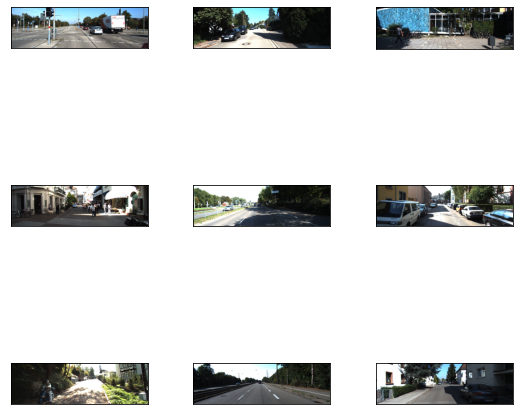

In [3]:
_ = tfds.show_examples(ds_train, ds_info)

- Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ÌôïÏù∏ (ds_info)... Ï£ºÏöî Ï†ïÎ≥¥:
  - 6,347Í∞úÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(training data)
  - 711Í∞úÏùò ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞(test data)
  - 423Í∞úÏùò Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞(validation data)
  - ÎùºÎ≤®ÏóêÎäî alpha, bbox, dimensions, location, occluded, rotation_y, truncated Îì±Ïùò Ï†ïÎ≥¥

In [4]:
ds_info

tfds.core.DatasetInfo(
    name='kitti',
    full_name='kitti/3.2.0',
    description="""
    Kitti contains a suite of vision tasks built using an autonomous driving
    platform. The full benchmark contains many tasks such as stereo, optical flow,
    visual odometry, etc. This dataset contains the object detection dataset,
    including the monocular images and bounding boxes. The dataset contains 7481
    training images annotated with 3D bounding boxes. A full description of the
    annotations can be found in the readme of the object development kit readme on
    the Kitti homepage.
    """,
    homepage='http://www.cvlibs.net/datasets/kitti/',
    data_path='/aiffel/aiffel/object_detection/data/kitti/3.2.0',
    download_size=11.71 GiB,
    dataset_size=5.27 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.float32,
     

# 8-3. ÏûêÏú®Ï£ºÌñâ Î≥¥Ï°∞Ïû•Ïπò (2) Îç∞Ïù¥ÌÑ∞ ÏßÅÏ†ë ÌôïÏù∏ÌïòÍ∏∞

- ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÏßÅÏ†ë Ïù¥Ìï¥ÌïòÍ∏∞

------Example------
['image', 'image/file_name', 'objects']
------objects------
{'alpha': <tf.Tensor: shape=(6,), dtype=float32, numpy=array([-0.86, -1.6 , -0.51,  1.44,  1.77,  1.94], dtype=float32)>, 'bbox': <tf.Tensor: shape=(6, 4), dtype=float32, numpy=
array([[0.0027027 , 0.        , 0.45554054, 0.24836601],
       [0.41256756, 0.8102206 , 0.60175675, 0.8412255 ],
       [0.45089188, 0.8252696 , 0.58402705, 0.96843135],
       [0.45332432, 0.3608987 , 0.53432435, 0.3954902 ],
       [0.4384054 , 0.29299837, 0.5387027 , 0.31436273],
       [0.39505404, 0.16185458, 0.51954055, 0.24050653]], dtype=float32)>, 'dimensions': <tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1.5 , 1.78, 3.69],
       [1.72, 0.78, 1.71],
       [1.51, 1.75, 4.45],
       [1.44, 1.64, 3.68],
       [1.87, 0.86, 2.12],
       [1.63, 1.78, 4.54]], dtype=float32)>, 'location': <tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[ -3.16,   1.68,   3.35],
       [ 10.47,   0.9 ,  18.34],
       [ 16.09

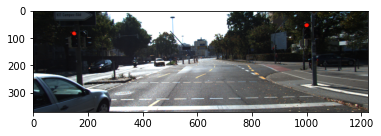

In [5]:
sample = ds_train.take(1)

for example in sample:  
    print('------Example------')
    print(list(example.keys()))
    image = example["image"]
    filename = example["image/file_name"].numpy().decode('utf-8')
    objects = example["objects"]

print('------objects------')
print(objects)

img = Image.fromarray(image.numpy())
plt.imshow(img)
plt.show()

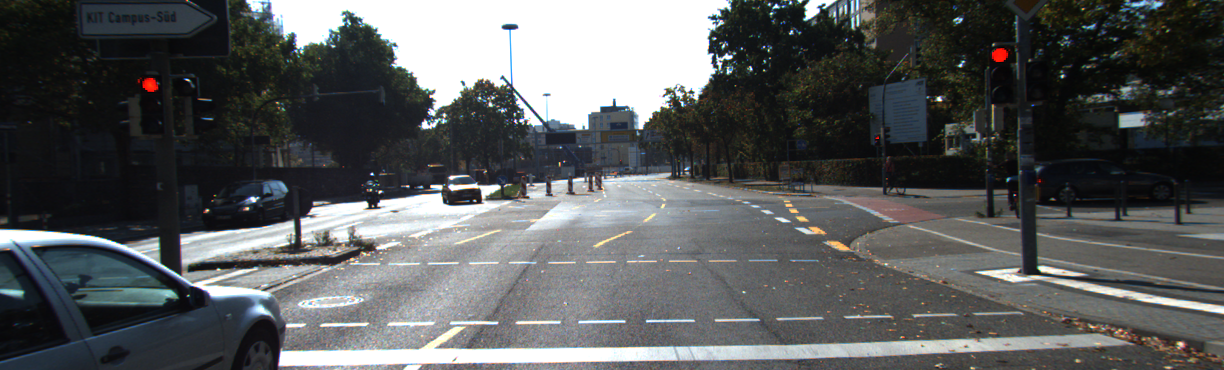

In [6]:
# ÌÖåÏä§Ìä∏ ÏΩîÎìú... plt.show() Î≥¥Îã§ ÌÅ¨Í≤å ÎîîÏä§ÌîåÎ†àÏù¥
img.show()

In [7]:
print(image)

tf.Tensor(
[[[20 30 24]
  [21 30 18]
  [21 27 14]
  ...
  [51 65 58]
  [43 52 52]
  [44 49 33]]

 [[19 28 23]
  [18 29 20]
  [18 27 18]
  ...
  [38 52 42]
  [43 42 34]
  [42 39 28]]

 [[33 33 24]
  [35 31 22]
  [30 29 19]
  ...
  [38 34 11]
  [41 28 17]
  [39 31 26]]

 ...

 [[33 45 58]
  [33 45 59]
  [33 46 59]
  ...
  [60 50 42]
  [69 52 43]
  [69 58 49]]

 [[33 47 58]
  [33 47 59]
  [34 47 58]
  ...
  [70 51 43]
  [72 52 42]
  [73 53 46]]

 [[33 47 57]
  [34 47 57]
  [35 46 57]
  ...
  [68 59 47]
  [71 52 46]
  [73 49 42]]], shape=(370, 1224, 3), dtype=uint8)


In [8]:
print(img)
print(img.size)
width, height = img.size
print(width, height)
print(img.format)
print(img.mode)
print(img.width)
print(img.height)

<PIL.Image.Image image mode=RGB size=1224x370 at 0x7F6EF9F50700>
(1224, 370)
1224 370
None
RGB
1224
370


- Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∑∏Î†§Í∏∞

(1224, 370)
(1224, 370)
[   0.       991.71    1010.12994  441.74002  358.63     198.11   ]
[369.      217.35    203.17    202.27    207.79001 223.83   ]
[ 304.      1029.66    1185.36     484.08002  384.78     294.38   ]
[201.45    147.35    153.90999 172.29999 170.68    177.77   ]
[[   0.       369.       304.       201.45   ]
 [ 991.71     217.35    1029.66     147.35   ]
 [1010.12994  203.17    1185.36     153.90999]
 [ 441.74002  202.27     484.08002  172.29999]
 [ 358.63     207.79001  384.78     170.68   ]
 [ 198.11     223.83     294.38     177.77   ]]


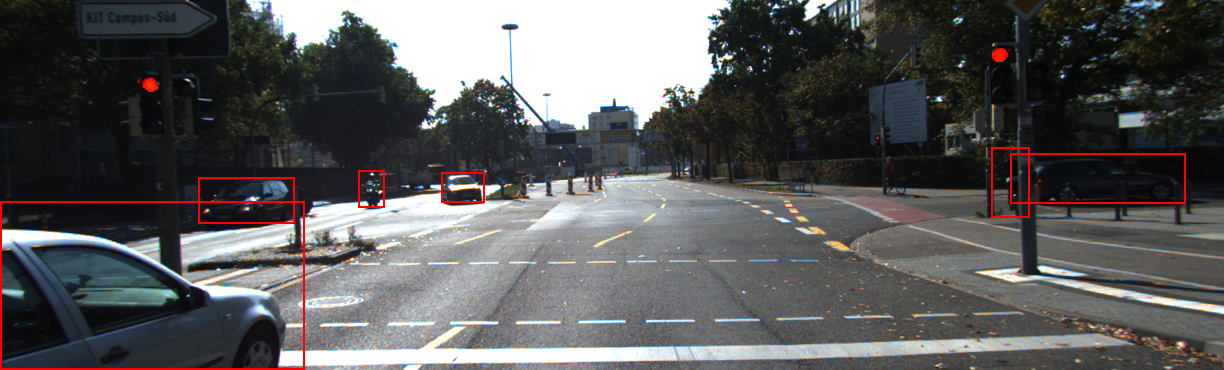

In [9]:
def visualize_bbox(input_image, object_bbox):
    input_image = copy.deepcopy(input_image)
    draw = ImageDraw.Draw(input_image)
    
    # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú(x_min, x_max, y_min, y_max) Íµ¨ÌïòÍ∏∞
    #width, height = img.size
    width, height = input_image.size # ÏΩîÎìú ÏàòÏ†ï ÌïÑÏöî !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    print(img.size)
    print(input_image.size)
    
    x_min = object_bbox[:,1] * width
    x_max = object_bbox[:,3] * width
    y_min = height - object_bbox[:,0] * height
    y_max = height - object_bbox[:,2] * height

    print(x_min)
    print(y_min)
    print(x_max)
    print(y_max)
    
    # Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
    rects = np.stack([x_min, y_min, x_max, y_max], axis=1)
    print(rects)
    
    for _rect in rects:
        draw.rectangle(_rect, outline=(255,0,0), width=2)

    return input_image

visualize_bbox(img, objects['bbox'].numpy())

# 8-4. RetinaNet
- Focal Loss for Dense Object Detection ÎÖºÎ¨∏ÏùÑ ÌÜµÌï¥ Í≥µÍ∞úÎêú detection Î™®Îç∏
- ÏÑ±Îä•Ïù¥ ÎÇÆÏùÄ Î¨∏Ï†ú Ìï¥Í≤∞ÏùÑ ÏúÑÌï¥ÏÑú focal lossÏôÄ FPN(Feature Pyramid Network)ÏùÑ Ï†ÅÏö©Ìïú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÇ¨Ïö©

# 8-5. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

### Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑ ÎùºÏù∏
- Ï£ºÏñ¥ÏßÑ KITTI Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏóê ÎßûÎäî ÌòïÌÉúÎ°ú Î∞îÍæ∏Í∏∞
- Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨Ï∂ï 4Îã®Í≥Ñ
  - (1) xÏôÄ yÏ¢åÌëú ÏúÑÏπò ÍµêÏ≤¥
  - (2) Î¨¥ÏûëÏúÑÎ°ú ÏàòÌèâ Îí§ÏßëÍ∏∞(Flip)
  - (3) Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï°∞Ï†ï Î∞è Ìå®Îî© Ï∂îÍ∞Ä
  - (4) Ï¢åÌëúÍ≥ÑÎ•º [x_min, y_min, x_max, y_max]ÏóêÏÑú [x_min, y_min, width, height]ÏúºÎ°ú ÏàòÏ†ï

In [10]:
def swap_xy(boxes):
    return tf.stack([boxes[:, 1], boxes[:, 0], boxes[:, 3], boxes[:, 2]], axis=-1)

print('Ïäù=3')

Ïäù=3


In [11]:
def random_flip_horizontal(image, boxes):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        boxes = tf.stack(
           [1 - boxes[:, 2], boxes[:, 1], 1 - boxes[:, 0], boxes[:, 3]], axis=-1
        )
        
    return image, boxes

print('Ïäù=3')

Ïäù=3


Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Î∞îÍøÄ ÎïåÎäî Í≥†Î†§Ìï† Ï†êÏù¥ ÏûàÏäµÎãàÎã§. Ïù¥ÎØ∏ÏßÄÏùò ÎπÑÏú®ÏùÄ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄÎêòÏñ¥Ïïº ÌïòÍ≥†, Ïù¥ÎØ∏ÏßÄÏùò ÏµúÎåÄ/ÏµúÏÜå ÌÅ¨Í∏∞ÎèÑ Ï†úÌïúÌï¥Ïïº ÌïòÍ±∞Îì†Ïöî. Îòê Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Î∞îÍæº ÌõÑÏóêÎèÑ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Î™®Îç∏Ïóê ÏûÖÎ†•ÎêòÎäî Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Îäî strideÏùò Î∞∞ÏàòÍ∞Ä ÎêòÎèÑÎ°ù ÎßåÎì§ Í±∞ÏòàÏöî.

ÏòàÎ•º Îì§Ïñ¥ 600x720 ÌÅ¨Í∏∞Ïùò Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎã§Î©¥ 800x960 ÌÅ¨Í∏∞Î°ú Î∞îÍøÄ Ïàò ÏûàÏäµÎãàÎã§. Ïó¨Í∏∞Ïóê strideÎ•º 128Î°ú ÎÜìÏïÑ 800x960 ÌÅ¨Í∏∞Ïùò Ïù¥ÎØ∏ÏßÄÏóê Ìå®Îî©ÏùÑ ÎçîÌï¥ 896x1024 ÌÅ¨Í∏∞Ïùò Ïù¥ÎØ∏ÏßÄÎ°ú Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÍ≤†Îã§Îäî Ïù¥ÏïºÍπÅÎãàÎã§. Î™®Îç∏Ïóê ÏûÖÎ†•ÎêòÎäî Ïù¥ÎØ∏ÏßÄÏóêÎäî Í≤ÄÏ†ï ÌÖåÎëêÎ¶¨Í∞Ä ÏûàÍ≤†Íµ∞Ïöî!

Ïã§Ï†úÎ°ú ÏûÖÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ïñ¥ÎñªÍ≤å Î∞îÍøÄÏßÄÎäî min_side, max_side, min_side_range, strideÎì±Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎèºÏöî. Í∑∏Î¶¨Í≥† ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† ÎïåÎäî ÏûÖÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Îã§ÏñëÌïú ÌÅ¨Í∏∞Î°ú Î∞îÍøÄ ÌïÑÏöîÎäî ÏóÜÏúºÎãà Î∂ÑÍ∏∞Ï≤òÎ¶¨Î•º Ìï¥Ï§çÎãàÎã§.

In [12]:
def resize_and_pad_image(image, training=True):

    min_side = 800.0
    max_side = 1333.0
    min_side_range = [640, 1024]
    stride = 128.0
    
    image_shape = tf.cast(tf.shape(image)[:2], dtype=tf.float32)
    if training:
        min_side = tf.random.uniform((), min_side_range[0], min_side_range[1], dtype=tf.float32)
    ratio = min_side / tf.reduce_min(image_shape)
    if ratio * tf.reduce_max(image_shape) > max_side:
        ratio = max_side / tf.reduce_max(image_shape)
    image_shape = ratio * image_shape
    image = tf.image.resize(image, tf.cast(image_shape, dtype=tf.int32))
    padded_image_shape = tf.cast(
        tf.math.ceil(image_shape / stride) * stride, dtype=tf.int32
    )
    image = tf.image.pad_to_bounding_box(
        image, 0, 0, padded_image_shape[0], padded_image_shape[1]
    )
    return image, image_shape, ratio

print('Ïäù=3')

Ïäù=3


In [13]:
def convert_to_xywh(boxes):
    return tf.concat(
        [(boxes[..., :2] + boxes[..., 2:]) / 2.0, boxes[..., 2:] - boxes[..., :2]],
        axis=-1,
    )

print('Ïäù=3')

Ïäù=3


- Ï§ÄÎπÑÎêú Ìï®ÏàòÎì§ÏùÑ Ïó∞Í≤∞

In [14]:
def preprocess_data(sample):
    image = sample["image"]
    bbox = swap_xy(sample["objects"]["bbox"])
    class_id = tf.cast(sample["objects"]["type"], dtype=tf.int32)

    image, bbox = random_flip_horizontal(image, bbox)
    image, image_shape, _ = resize_and_pad_image(image)

    bbox = tf.stack(
        [
            bbox[:, 0] * image_shape[1],
            bbox[:, 1] * image_shape[0],
            bbox[:, 2] * image_shape[1],
            bbox[:, 3] * image_shape[0],
        ],
        axis=-1,
    )
    bbox = convert_to_xywh(bbox)
    return image, bbox, class_id

print('Ïäù=3')

Ïäù=3


### Ïù∏ÏΩîÎî©
- Anchor Box ÏÉùÏÑ±

In [15]:
class AnchorBox:
    def __init__(self):
        self.aspect_ratios = [0.5, 1.0, 2.0]
        self.scales = [2 ** x for x in [0, 1 / 3, 2 / 3]]

        self._num_anchors = len(self.aspect_ratios) * len(self.scales)
        self._strides = [2 ** i for i in range(3, 8)]
        self._areas = [x ** 2 for x in [32.0, 64.0, 128.0, 256.0, 512.0]]
        self._anchor_dims = self._compute_dims()

    def _compute_dims(self):
        anchor_dims_all = []
        for area in self._areas:
            anchor_dims = []
            for ratio in self.aspect_ratios:
                anchor_height = tf.math.sqrt(area / ratio)
                anchor_width = area / anchor_height
                dims = tf.reshape(
                    tf.stack([anchor_width, anchor_height], axis=-1), [1, 1, 2]
                )
                for scale in self.scales:
                    anchor_dims.append(scale * dims)
            anchor_dims_all.append(tf.stack(anchor_dims, axis=-2))
        return anchor_dims_all

    def _get_anchors(self, feature_height, feature_width, level):
        rx = tf.range(feature_width, dtype=tf.float32) + 0.5
        ry = tf.range(feature_height, dtype=tf.float32) + 0.5
        centers = tf.stack(tf.meshgrid(rx, ry), axis=-1) * self._strides[level - 3]
        centers = tf.expand_dims(centers, axis=-2)
        centers = tf.tile(centers, [1, 1, self._num_anchors, 1])
        dims = tf.tile(
            self._anchor_dims[level - 3], [feature_height, feature_width, 1, 1]
        )
        anchors = tf.concat([centers, dims], axis=-1)
        return tf.reshape(
            anchors, [feature_height * feature_width * self._num_anchors, 4]
        )

    def get_anchors(self, image_height, image_width):
        anchors = [
            self._get_anchors(
                tf.math.ceil(image_height / 2 ** i),
                tf.math.ceil(image_width / 2 ** i),
                i,
            )
            for i in range(3, 8)
        ]
        return tf.concat(anchors, axis=0)

print('Ïäù=3')

Ïäù=3


- IoU Í≥ÑÏÇ∞

In [16]:
def convert_to_corners(boxes):
    return tf.concat(
        [boxes[..., :2] - boxes[..., 2:] / 2.0, boxes[..., :2] + boxes[..., 2:] / 2.0],
        axis=-1,
    )

def compute_iou(boxes1, boxes2):
    boxes1_corners = convert_to_corners(boxes1)
    boxes2_corners = convert_to_corners(boxes2)
    lu = tf.maximum(boxes1_corners[:, None, :2], boxes2_corners[:, :2])
    rd = tf.minimum(boxes1_corners[:, None, 2:], boxes2_corners[:, 2:])
    intersection = tf.maximum(0.0, rd - lu)
    intersection_area = intersection[:, :, 0] * intersection[:, :, 1]
    boxes1_area = boxes1[:, 2] * boxes1[:, 3]
    boxes2_area = boxes2[:, 2] * boxes2[:, 3]
    union_area = tf.maximum(
        boxes1_area[:, None] + boxes2_area - intersection_area, 1e-8
    )
    return tf.clip_by_value(intersection_area / union_area, 0.0, 1.0)

print('Ïäù=3')

Ïäù=3


- Ïã§Ï†ú ÎùºÎ≤®ÏùÑ Anchor BoxÏóê ÎßûÏ∂∞Ï£ºÎäî ÌÅ¥ÎûòÏä§ Íµ¨ÏÑ±
  - variance: ÏÉÅÌïòÏ¢åÏö∞Ïùò Ï∞®Ïù¥ÏóêÎäî 0.1, Í∞ÄÎ°úÏÑ∏Î°ú ÌÅ¨Í∏∞Ïùò Ï∞®Ïù¥ÏóêÎäî 0.2Î•º ÏÇ¨Ïö©
  - IoUÍ∞Ä 0.5Î≥¥Îã§ ÎÜíÏúºÎ©¥ Î¨ºÏ≤¥, 0.4Î≥¥Îã§ ÎÇÆÏúºÎ©¥ Î∞∞Í≤Ω

In [17]:
class LabelEncoder:

    def __init__(self):
        self._anchor_box = AnchorBox()
        self._box_variance = tf.convert_to_tensor(
            [0.1, 0.1, 0.2, 0.2], dtype=tf.float32
        )

    def _match_anchor_boxes(
        self, anchor_boxes, gt_boxes, match_iou=0.5, ignore_iou=0.4
    ):
        iou_matrix = compute_iou(anchor_boxes, gt_boxes)
        max_iou = tf.reduce_max(iou_matrix, axis=1)
        matched_gt_idx = tf.argmax(iou_matrix, axis=1)
        positive_mask = tf.greater_equal(max_iou, match_iou)
        negative_mask = tf.less(max_iou, ignore_iou)
        ignore_mask = tf.logical_not(tf.logical_or(positive_mask, negative_mask))
        return (
            matched_gt_idx,
            tf.cast(positive_mask, dtype=tf.float32),
            tf.cast(ignore_mask, dtype=tf.float32),
        )

    def _compute_box_target(self, anchor_boxes, matched_gt_boxes):
        box_target = tf.concat(
            [
                (matched_gt_boxes[:, :2] - anchor_boxes[:, :2]) / anchor_boxes[:, 2:],
                tf.math.log(matched_gt_boxes[:, 2:] / anchor_boxes[:, 2:]),
            ],
            axis=-1,
        )
        box_target = box_target / self._box_variance
        return box_target

    def _encode_sample(self, image_shape, gt_boxes, cls_ids):
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        cls_ids = tf.cast(cls_ids, dtype=tf.float32)
        matched_gt_idx, positive_mask, ignore_mask = self._match_anchor_boxes(
            anchor_boxes, gt_boxes
        )
        matched_gt_boxes = tf.gather(gt_boxes, matched_gt_idx)
        box_target = self._compute_box_target(anchor_boxes, matched_gt_boxes)
        matched_gt_cls_ids = tf.gather(cls_ids, matched_gt_idx)
        cls_target = tf.where(
            tf.not_equal(positive_mask, 1.0), -1.0, matched_gt_cls_ids
        )
        cls_target = tf.where(tf.equal(ignore_mask, 1.0), -2.0, cls_target)
        cls_target = tf.expand_dims(cls_target, axis=-1)
        label = tf.concat([box_target, cls_target], axis=-1)
        return label

    def encode_batch(self, batch_images, gt_boxes, cls_ids):
        images_shape = tf.shape(batch_images)
        batch_size = images_shape[0]

        labels = tf.TensorArray(dtype=tf.float32, size=batch_size, dynamic_size=True)
        for i in range(batch_size):
            label = self._encode_sample(images_shape, gt_boxes[i], cls_ids[i])
            labels = labels.write(i, label)
        batch_images = tf.keras.applications.resnet.preprocess_input(batch_images)
        return batch_images, labels.stack()
    
print('Ïäù=3')

Ïäù=3


# 8-6. Î™®Îç∏ ÏûëÏÑ±
### Feature Pyramid
- FPN(Feature Pyramid Network) Íµ¨ÏÑ±
  - FPNÏùÑ ÏïΩÍ∞Ñ ÏàòÏ†ï

In [18]:
class FeaturePyramid(tf.keras.layers.Layer):

    def __init__(self, backbone):
        super(FeaturePyramid, self).__init__(name="FeaturePyramid")
        self.backbone = backbone
        self.conv_c3_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c4_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c5_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c3_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c4_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c5_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c6_3x3 = tf.keras.layers.Conv2D(256, 3, 2, "same")
        self.conv_c7_3x3 = tf.keras.layers.Conv2D(256, 3, 2, "same")
        self.upsample_2x = tf.keras.layers.UpSampling2D(2)

    def call(self, images, training=False):
        c3_output, c4_output, c5_output = self.backbone(images, training=training)
        p3_output = self.conv_c3_1x1(c3_output)
        p4_output = self.conv_c4_1x1(c4_output)
        p5_output = self.conv_c5_1x1(c5_output)
        p4_output = p4_output + self.upsample_2x(p5_output)
        p3_output = p3_output + self.upsample_2x(p4_output)
        p3_output = self.conv_c3_3x3(p3_output)
        p4_output = self.conv_c4_3x3(p4_output)
        p5_output = self.conv_c5_3x3(p5_output)
        p6_output = self.conv_c6_3x3(c5_output)
        p7_output = self.conv_c7_3x3(tf.nn.relu(p6_output))
        return p3_output, p4_output, p5_output, p6_output, p7_output

print('Ïäù=3')

Ïäù=3


- build_head Ìï®Ïàò Íµ¨ÏÑ±
  - classÎ•º ÏòàÏ∏°ÌïòÎäî headÏôÄ boxÎ•º ÏòàÏ∏°ÌïòÎäî headÍ∞Ä Î≥ÑÎèÑÎ°ú Ï°¥Ïû¨
  - Ìï®ÏàòÎäî ÌïòÎÇòÎßå ÎßåÎì§Í≥† Îëê Î≤à Ìò∏Ï∂ú

In [19]:
def build_head(output_filters, bias_init):
    head = tf.keras.Sequential([tf.keras.Input(shape=[None, None, 256])])
    kernel_init = tf.initializers.RandomNormal(0.0, 0.01)
    for _ in range(4):
        head.add(
            tf.keras.layers.Conv2D(256, 3, padding="same", kernel_initializer=kernel_init)
        )
        head.add(tf.keras.layers.ReLU())
    head.add(
        tf.keras.layers.Conv2D(
            output_filters,
            3,
            1,
            padding="same",
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
        )
    )
    return head

print('Ïäù=3')

Ïäù=3


- Backbone Íµ¨ÏÑ±
  - ResNet50
  - FPNÏóê Ïù¥Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥ÎèÑ outputÏúºÎ°ú Ïó∞Í≤∞

In [20]:
def get_backbone():
    backbone = tf.keras.applications.ResNet50(
        include_top=False, input_shape=[None, None, 3]
    )
    c3_output, c4_output, c5_output = [
        backbone.get_layer(layer_name).output
        for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]
    ]
    return tf.keras.Model(
        inputs=[backbone.inputs], outputs=[c3_output, c4_output, c5_output]
    )

print('Ïäù=3')

Ïäù=3


- RetinaNet ÏôÑÏÑ±
  - Backbone + FPN + classificationÏö© head + boxÏö© head

In [21]:
class RetinaNet(tf.keras.Model):

    def __init__(self, num_classes, backbone):
        super(RetinaNet, self).__init__(name="RetinaNet")
        self.fpn = FeaturePyramid(backbone)
        self.num_classes = num_classes

        prior_probability = tf.constant_initializer(-np.log((1 - 0.01) / 0.01))
        self.cls_head = build_head(9 * num_classes, prior_probability)
        self.box_head = build_head(9 * 4, "zeros")

    def call(self, image, training=False):
        features = self.fpn(image, training=training)
        N = tf.shape(image)[0]
        cls_outputs = []
        box_outputs = []
        for feature in features:
            box_outputs.append(tf.reshape(self.box_head(feature), [N, -1, 4]))
            cls_outputs.append(
                tf.reshape(self.cls_head(feature), [N, -1, self.num_classes])
            )
        cls_outputs = tf.concat(cls_outputs, axis=1)
        box_outputs = tf.concat(box_outputs, axis=1)
        return tf.concat([box_outputs, cls_outputs], axis=-1)

print('Ïäù=3')

Ïäù=3


- Loss Ìï®Ïàò Íµ¨ÏÑ±
  - Classification: Focal Loss ÏÇ¨Ïö© (alphaÏôÄ gammaÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Î¨ºÏ≤¥Ïùº ÎïåÏôÄ Î∞∞Í≤ΩÏùº ÎïåÏùò ÏãùÏù¥ Îã¨ÎùºÏßê)
  - Box Regression: Smooth L1 Loss ÏÇ¨Ïö© (deltaÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í≥ÑÏÇ∞Ïù¥ Îã¨ÎùºÏßê)

In [22]:
class RetinaNetBoxLoss(tf.losses.Loss):

    def __init__(self, delta):
        super(RetinaNetBoxLoss, self).__init__(
            reduction="none", name="RetinaNetBoxLoss"
        )
        self._delta = delta

    def call(self, y_true, y_pred):
        difference = y_true - y_pred
        absolute_difference = tf.abs(difference)
        squared_difference = difference ** 2
        loss = tf.where(
            tf.less(absolute_difference, self._delta),
            0.5 * squared_difference,
            absolute_difference - 0.5,
        )
        return tf.reduce_sum(loss, axis=-1)


class RetinaNetClassificationLoss(tf.losses.Loss):

    def __init__(self, alpha, gamma):
        super(RetinaNetClassificationLoss, self).__init__(
            reduction="none", name="RetinaNetClassificationLoss"
        )
        self._alpha = alpha
        self._gamma = gamma

    def call(self, y_true, y_pred):
        cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=y_true, logits=y_pred
        )
        probs = tf.nn.sigmoid(y_pred)
        alpha = tf.where(tf.equal(y_true, 1.0), self._alpha, (1.0 - self._alpha))
        pt = tf.where(tf.equal(y_true, 1.0), probs, 1 - probs)
        loss = alpha * tf.pow(1.0 - pt, self._gamma) * cross_entropy
        return tf.reduce_sum(loss, axis=-1)


class RetinaNetLoss(tf.losses.Loss):

    def __init__(self, num_classes=8, alpha=0.25, gamma=2.0, delta=1.0):
        super(RetinaNetLoss, self).__init__(reduction="auto", name="RetinaNetLoss")
        self._clf_loss = RetinaNetClassificationLoss(alpha, gamma)
        self._box_loss = RetinaNetBoxLoss(delta)
        self._num_classes = num_classes

    def call(self, y_true, y_pred):
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        box_labels = y_true[:, :, :4]
        box_predictions = y_pred[:, :, :4]
        cls_labels = tf.one_hot(
            tf.cast(y_true[:, :, 4], dtype=tf.int32),
            depth=self._num_classes,
            dtype=tf.float32,
        )
        cls_predictions = y_pred[:, :, 4:]
        positive_mask = tf.cast(tf.greater(y_true[:, :, 4], -1.0), dtype=tf.float32)
        ignore_mask = tf.cast(tf.equal(y_true[:, :, 4], -2.0), dtype=tf.float32)
        clf_loss = self._clf_loss(cls_labels, cls_predictions)
        box_loss = self._box_loss(box_labels, box_predictions)
        clf_loss = tf.where(tf.equal(ignore_mask, 1.0), 0.0, clf_loss)
        box_loss = tf.where(tf.equal(positive_mask, 1.0), box_loss, 0.0)
        normalizer = tf.reduce_sum(positive_mask, axis=-1)
        clf_loss = tf.math.divide_no_nan(tf.reduce_sum(clf_loss, axis=-1), normalizer)
        box_loss = tf.math.divide_no_nan(tf.reduce_sum(box_loss, axis=-1), normalizer)
        loss = clf_loss + box_loss
        return loss

print('Ïäù=3')

Ïäù=3


# 8-7. Î™®Îç∏ ÌïôÏäµ
- Î™®Îç∏ Ï°∞Î¶Ω

In [23]:
num_classes = 8
batch_size = 2

resnet50_backbone = get_backbone()
loss_fn = RetinaNetLoss(num_classes)
model = RetinaNet(num_classes, resnet50_backbone)

print('Ïäù=3')

94781440/94765736 [==============================] - 0s 0us/step
Ïäù=3


- Î™®Îç∏ Ïª¥ÌååÏùº
  - Learning Rate Ï°∞Ï†ï
  - Optimizer: SGD

In [24]:
learning_rates = [2.5e-06, 0.000625, 0.00125, 0.0025, 0.00025, 2.5e-05]
learning_rate_boundaries = [125, 250, 500, 240000, 360000]
learning_rate_fn = tf.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=learning_rate_boundaries, values=learning_rates
)
optimizer = tf.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)
model.compile(loss=loss_fn, optimizer=optimizer)

- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú ÌååÏù¥ÌîÑÎùºÏù∏ ÏÉùÏÑ±

In [25]:
label_encoder = LabelEncoder()
(train_dataset, val_dataset), dataset_info = tfds.load(
    "kitti", split=["train", "validation"], with_info=True, data_dir=DATA_PATH
)

autotune = tf.data.AUTOTUNE
train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=autotune)
train_dataset = train_dataset.shuffle(8 * batch_size)
train_dataset = train_dataset.padded_batch(
    batch_size=batch_size, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
train_dataset = train_dataset.map(
    label_encoder.encode_batch, num_parallel_calls=autotune
)
train_dataset = train_dataset.prefetch(autotune)

val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=autotune)
val_dataset = val_dataset.padded_batch(
    batch_size=1, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
val_dataset = val_dataset.map(label_encoder.encode_batch, num_parallel_calls=autotune)
val_dataset = val_dataset.prefetch(autotune)

print('Ïäù=3')

Ïäù=3


- Î™®Îç∏ ÌõàÎ†®(ÌïôÏäµ)
  - 1 epochÎãπ ÌïôÏäµ ÏãúÍ∞ÑÏù¥ ÏÉÅÎãπÌûà Ïò§Îûò Í±∏Î¶¨Í∏∞ ÎïåÎ¨∏Ïóê Ïó¨Í∏∞ÏÑúÎäî ÌïôÏäµÏãúÌÇ§Îäî ÏòàÏãú ÏΩîÎìúÎßå Ï†úÏãú
  - Îí§ÏóêÏÑ† ÎØ∏Î¶¨ ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ ÏÇ¨Ïö©Ìï† ÏòàÏ†ï üòô

In [26]:
"""
model_dir = os.getenv('HOME') + '/aiffel/object_detection/data/checkpoints/'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(model_dir, "weights" + "_epoch_{epoch}"),
        monitor="loss",
        save_best_only=False,
        save_weights_only=True,
        verbose=1,
    )
]

epochs = 1

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=callbacks_list
)
"""

'\nmodel_dir = os.getenv(\'HOME\') + \'/aiffel/object_detection/data/checkpoints/\'\ncallbacks_list = [\n    tf.keras.callbacks.ModelCheckpoint(\n        filepath=os.path.join(model_dir, "weights" + "_epoch_{epoch}"),\n        monitor="loss",\n        save_best_only=False,\n        save_weights_only=True,\n        verbose=1,\n    )\n]\n\nepochs = 1\n\nmodel.fit(\n    train_dataset,\n    validation_data=val_dataset,\n    epochs=epochs,\n    callbacks=callbacks_list\n)\n'

# 8-8. Í≤∞Í≥º ÌôïÏù∏ÌïòÍ∏∞
- ÎØ∏Î¶¨ ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [27]:
model_dir = os.getenv('HOME') + '/aiffel/object_detection/data/checkpoints/'
latest_checkpoint = tf.train.latest_checkpoint(model_dir)
model.load_weights(latest_checkpoint)

print('Ïäù=3')

Ïäù=3


- Î™®Îç∏Ïùò Ï∂îÎ°† Í≤∞Í≥ºÎ•º Ï≤òÎ¶¨Ìï† Ìï®ÏàòÎ•º Î†àÏù¥Ïñ¥ ÌòïÏãùÏúºÎ°ú Íµ¨ÏÑ±
  - 100Í∞úÏùò ÌõÑÎ≥¥Îßå Í≥®Îùº Ï≤òÎ¶¨
    - 0.05Î≥¥Îã§ ÎÜíÏùÄ box 100Í∞úÎ•º Í≥®Îùº 0.5 NMSÎ•º ÏßÑÌñâ
    
  - NMS(Non-Max Suppression)ÏùÄ tf.image.combined_non_max_suppression ÏÇ¨Ïö©
    - nmsed_boxes, nmsed_scores, nmsed_classes, valid_detectionsÎ•º Î∞òÌôò(return)

In [28]:
class DecodePredictions(tf.keras.layers.Layer):

    def __init__(
        self,
        num_classes=8,
        confidence_threshold=0.05,
        nms_iou_threshold=0.5,
        max_detections_per_class=100,
        max_detections=100,
        box_variance=[0.1, 0.1, 0.2, 0.2]
    ):
        super(DecodePredictions, self).__init__()
        self.num_classes = num_classes
        self.confidence_threshold = confidence_threshold
        self.nms_iou_threshold = nms_iou_threshold
        self.max_detections_per_class = max_detections_per_class
        self.max_detections = max_detections

        self._anchor_box = AnchorBox()
        self._box_variance = tf.convert_to_tensor(
            box_variance, dtype=tf.float32
        )

    def _decode_box_predictions(self, anchor_boxes, box_predictions):
        boxes = box_predictions * self._box_variance
        boxes = tf.concat(
            [
                boxes[:, :, :2] * anchor_boxes[:, :, 2:] + anchor_boxes[:, :, :2],
                tf.math.exp(boxes[:, :, 2:]) * anchor_boxes[:, :, 2:],
            ],
            axis=-1,
        )
        boxes_transformed = convert_to_corners(boxes)
        return boxes_transformed

    def call(self, images, predictions):
        image_shape = tf.cast(tf.shape(images), dtype=tf.float32)
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        box_predictions = predictions[:, :, :4]
        cls_predictions = tf.nn.sigmoid(predictions[:, :, 4:])
        boxes = self._decode_box_predictions(anchor_boxes[None, ...], box_predictions)

        return tf.image.combined_non_max_suppression(
            tf.expand_dims(boxes, axis=2),
            cls_predictions,
            self.max_detections_per_class,
            self.max_detections,
            self.nms_iou_threshold,
            self.confidence_threshold,
            clip_boxes=False,
        )

print('Ïäù=3')

Ïäù=3


- Ï∂îÎ°† Î™®Îç∏ Ï°∞Î¶Ω

In [29]:
image = tf.keras.Input(shape=[None, None, 3], name="image")
predictions = model(image, training=False)
detections = DecodePredictions(confidence_threshold=0.5)(image, predictions)
inference_model = tf.keras.Model(inputs=image, outputs=detections)

print('Ïäù=3')

Ïäù=3


- Î™®Îç∏Ïùò Ï∂îÎ°† Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [30]:
def visualize_detections(
    image, boxes, classes, scores, figsize=(7, 7), linewidth=1, color=[0, 0, 1]
):
    image = np.array(image, dtype=np.uint8)
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(image)
    ax = plt.gca()
    for box, _cls, score in zip(boxes, classes, scores):
        text = "{}: {:.2f}".format(_cls, score)
        x1, y1, x2, y2 = box
        w, h = x2 - x1, y2 - y1
        patch = plt.Rectangle(
            [x1, y1], w, h, fill=False, edgecolor=color, linewidth=linewidth
        )
        ax.add_patch(patch)
        ax.text(
            x1,
            y1,
            text,
            bbox={"facecolor": color, "alpha": 0.4},
            clip_box=ax.clipbox,
            clip_on=True,
        )
    plt.show()
    return ax

print('Ïäù=3')

Ïäù=3


- Ï∂îÎ°† ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [31]:
def prepare_image(image):
    image, _, ratio = resize_and_pad_image(image, training=False)
    image = tf.keras.applications.resnet.preprocess_input(image)
    return tf.expand_dims(image, axis=0), ratio

print('Ïäù=3')

Ïäù=3


- ÌïôÏäµÎêú Í≤∞Í≥º ÌôïÏù∏!!

CombinedNonMaxSuppression(nmsed_boxes=array([[[578.17865, 163.55217, 629.83685, 210.95714],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ,   

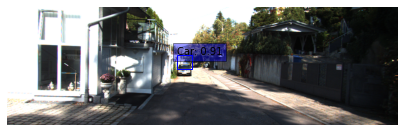

CombinedNonMaxSuppression(nmsed_boxes=array([[[203.23477 , 129.49358 , 346.98166 , 200.10774 ],
        [614.61127 , 175.55824 , 649.9234  , 204.8802  ],
        [317.85388 , 148.21446 , 392.97534 , 195.80397 ],
        [394.0982  , 135.78232 , 529.5347  , 281.0891  ],
        [-11.18222 ,  11.339554, 318.15726 , 184.18718 ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,  

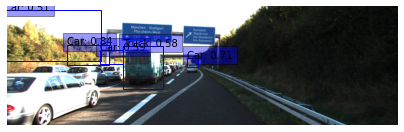

In [32]:
test_dataset = tfds.load("kitti", split="test", data_dir=DATA_PATH)
int2str = dataset_info.features["objects"]["type"].int2str

for sample in test_dataset.take(2):
    image = tf.cast(sample["image"], dtype=tf.float32)
    input_image, ratio = prepare_image(image)
    detections = inference_model.predict(input_image)
    
    print(detections)
    
    num_detections = detections.valid_detections[0]
    class_names = [
        int2str(int(x)) for x in detections.nmsed_classes[0][:num_detections]
    ]
    visualize_detections(
        image,
        detections.nmsed_boxes[0][:num_detections] / ratio,
        class_names,
        detections.nmsed_scores[0][:num_detections],
    )

In [33]:
print(int2str)

<bound method ClassLabel.int2str of ClassLabel(shape=(), dtype=tf.int64, num_classes=8)>


# 8-9. ÌîÑÎ°úÏ†ùÌä∏: ÏûêÏú®Ï£ºÌñâ Î≥¥Ï°∞ ÏãúÏä§ÌÖú ÎßåÎì§Í∏∞
Î®ºÏ†Ä Ï£ºÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†ÑÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§.

## 1. ÏûêÏú®Ï£ºÌñâ ÏãúÏä§ÌÖú ÎßåÎì§Í∏∞
ÏúÑÏóêÏÑú ÎßåÎì† Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÏïÑÎûòÏùò Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Ï£ºÏÑ∏Ïöî.

- ÏûÖÎ†•ÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º Î∞õÏäµÎãàÎã§.
- Ï†ïÏßÄÏ°∞Í±¥Ïóê ÎßûÎäî Í≤ΩÏö∞ "Stop" ÏïÑÎãå Í≤ΩÏö∞ "Go"Î•º Î∞òÌôòÌï©ÎãàÎã§.
- Ï°∞Í±¥ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
  - ÏÇ¨ÎûåÏù¥ Ìïú Î™Ö Ïù¥ÏÉÅ ÏûàÎäî Í≤ΩÏö∞
  - Ï∞®ÎüâÏùò ÌÅ¨Í∏∞(width or height)Í∞Ä 300pxÏù¥ÏÉÅÏù∏ Í≤ΩÏö∞

In [ ]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/data/stop_1.png'
#DATA_PATH = os.getenv('HOME') + '/aiffel/object_detection/data'

In [ ]:
def self_drive_assist(img_path, size_limit=300):
    # ÏΩîÎìú Íµ¨ÌòÑ
        # Ï†ïÏßÄÏ°∞Í±¥Ïóê ÎßûÏúºÎ©¥ return "Stop"
        # ÏïÑÎãå Í≤ΩÏö∞ return "Go"

print(self_drive_assist(img_path))

## 2. ÏûêÏú®Ï£ºÌñâ ÏãúÏä§ÌÖú ÌèâÍ∞ÄÌïòÍ∏∞
ÏïÑÎûò test_system() Î•º ÌÜµÌï¥ÏÑú ÏúÑÏóêÏÑú ÎßåÎì† Ìï®ÏàòÎ•º ÌèâÍ∞ÄÌï¥Î¥ÖÏãúÎã§. 10Ïû•Ïóê ÎåÄÌï¥ GoÏôÄ StopÏùÑ ÎßûÍ≤å Î∞òÌôòÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥† 100Ï†ê ÎßåÏ†êÏúºÎ°ú ÌèâÍ∞ÄÌï¥Ï§çÎãàÎã§.

In [ ]:
import os

def test_system(func):
    work_dir = os.getenv('HOME')+'/aiffel/object_detection/data'
    score = 0
    test_set=[
        ("stop_1.png", "Stop"),
        ("stop_2.png", "Stop"),
        ("stop_3.png", "Stop"),
        ("stop_4.png", "Stop"),
        ("stop_5.png", "Stop"),
        ("go_1.png", "Go"),
        ("go_2.png", "Go"),
        ("go_3.png", "Go"),
        ("go_4.png", "Go"),
        ("go_5.png", "Go"),
    ]
    
    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = func(image_path)
        if pred == answer:
            score += 10
    print(f"{score}Ï†êÏûÖÎãàÎã§.")

test_system(self_drive_assist)

## ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∞Ä

| ÌèâÍ∞ÄÎ¨∏Ìï≠ | ÏÉÅÏÑ∏Í∏∞Ï§Ä | ÏàòÌñâ Í≤∞Í≥º |
|:---|:---|:---|
| 1. KITTI Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú Î∂ÑÏÑùÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§. | KITTI Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Ï°∞ÏôÄ ÎÇ¥Ïö©ÏùÑ ÌååÏïÖÌïòÍ≥† Ïù¥Î•º ÌÜ†ÎåÄÎ°ú ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ÏÖã Í∞ÄÍ≥µÏùÑ Ï†ïÏÉÅ ÏßÑÌñâÌïòÏòÄÎã§. | ÍµêÏû¨ÎåÄÎ°ú Ìï® |
| 2. RetinaNet ÌïôÏäµÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏñ¥ object detection Í≤∞Í≥ºÏùò ÏãúÍ∞ÅÌôîÍπåÏßÄ ÏßÑÌñâÎêòÏóàÎã§. |  Î∞îÏö¥Îî©Î∞ïÏä§Í∞Ä Ï†ïÌôïÌûà ÌëúÏãúÎêú ÏãúÍ∞ÅÌôîÎêú Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïòÏòÄÎã§. | ÍµêÏû¨ÎåÄÎ°ú Ìïú Í≤∞Í≥º Î∞îÏö¥Îî© Î∞ïÏä§Í∞Ä ÏóâÎö±Ìïú Í≥≥Ïóê ÌëúÏãúÎê® |
| 3. ÏûêÏú®Ï£ºÌñâ Object Detection ÌÖåÏä§Ìä∏ÏãúÏä§ÌÖú Ï†ÅÏö©Í≤∞Í≥º ÎßåÏ°±Ïä§Îü¨Ïö¥ Ï†ïÌôïÎèÑ ÏÑ±Îä•ÏùÑ Îã¨ÏÑ±ÌïòÏòÄÎã§. | ÌÖåÏä§Ìä∏ ÏàòÌñâÍ≤∞Í≥º 90% Ïù¥ÏÉÅÏùò Ï†ïÌôïÎèÑÎ•º Î≥¥ÏòÄÎã§. | ÎÇ¥Ïö©ÏùÑ Ïù¥Ìï¥ÌïòÏßÄ Î™ªÌïòÏó¨ ÏΩîÎìú ÏûëÏÑ±ÏùÑ Î™ªÌï® | 


### ÌöåÍ≥†
- RetinaNet ÎÇ¥Ïö©ÏùÑ Ïù¥Ìï¥ÌïòÏßÄ Î™ªÌñàÎã§.
- Node #07Ïùò ÎÇ¥Ïö©ÎèÑ Andrew NgÍµêÏàòÏùò Ïú†Ìà¨Î∏å(C4W3L01~L10 Object Detection)Î•º ÌÜµÌï¥ Ïù¥Ìï¥ÌñàÎã§.
- Object DetectionÏóê ÎåÄÌïú Í∞úÎÖêÏ†ÅÏù∏ Ïù¥Ìï¥Î•º Î∞îÌÉïÏúºÎ°ú YOLO Îì±Í≥º Í∞ôÏùÄ Object DetectionÏùò Í∏∞Î≥∏Ïù¥ ÎêòÎäî Î™®Îç∏ Íµ¨ÌòÑÏùÑ ÌÜµÌï¥ Input/output, Î™®Îç∏ Íµ¨Ï°∞, ÏÜêÏã§Ìï®Ïàò Îì±ÏùÑ Ïù¥Ìï¥ÌïòÎäî Í≤ÉÏù¥ ÌïÑÏöîÌï† Í≤É Í∞ôÎã§.
- Ïù¥Îü¨Ìïú Í≥ºÏ†ïÏóÜÏù¥ Í∏∞Î≥∏ Î™®Îç∏ÏùÑ Í∞úÏÑ†Ìïú Î™®Îç∏(RetinaNet)Î°ú Ï†êÌîÑÌï¥ÏÑú Ïù¥Ìï¥Í∞Ä Îçî Ïñ¥Î†§Ïö¥ Í≤É Í∞ôÎã§.
- ÍµêÏû¨Ïùò ÎÇ¥Ïö©ÏùÑ Í∏∞Î∞òÏúºÎ°ú Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÏïåÏïÑÏïº ÌïòÎäî Input/Output Îì±Ïóê ÎåÄÌï¥ Ïù¥Ìï¥ÌïòÍ≥†Ïûê ÌñàÏúºÎÇò Ïñ¥Î†µÎã§.
- Ïù¥Îü¨Ìïú Í≤ÉÎì§ÏùÑ ÏûêÏäµÍ≥º ÌåÄ ÌïôÏäµÏúºÎ°ú Ìï¥Í≤∞ÌïòÍ∏∞Îäî Ïñ¥Î†µÎã§ (Ï†úÌïúÎêú ÏãúÍ∞ÑÏóê ÎÑàÎ¨¥ ÎßéÏùÄ ÎÇ¥Ïö©Ïù¥ ÏèüÏïÑÏ†∏ÏÑú Îì±).
- ÍµêÏû¨Ïùò ÏΩîÎìúÎåÄÎ°ú Ïã§ÌñâÌïú Í≤∞Í≥ºÏóêÏÑúÎèÑ Î∞îÏö¥Îî©Î∞ïÏä§Í∞Ä Ï†ïÌôïÌûà ÌëúÏãúÎêòÏßÄ ÏïäÎäîÎã§.
- Input/OutputÏùÑ ÌïòÎÇò ÌïòÎÇò ÎúØÏñ¥Î≥¥Í≥† Í¥ÄÎ†® ÎÖºÎ¨∏ÎèÑ Î≥¥Í≥† ÌïúÎã§Î©¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.
- ÏßÄÎÇú ProjectÏóêÏÑúÎèÑ ÎäêÍºàÏßÄÎßå TensorflowÎ•º Ìè¨Ìï®ÌïòÏó¨ Open CV, Pillow Îì±Ïóê ÎåÄÌïú Í∏∞Î≥∏Ï†ÅÏù∏ ÏÇ¨Ìï≠Îì§ÎèÑ ÏïåÏïÑÏïº ÌïúÎã§.
- Ï¢ÖÌï©ÌïòÎ©¥, Í≥µÎ∂ÄÌï¥Ïïº Ìï† ÎÇ¥Ïö©Ïóê ÎπÑÌï¥ Ï£ºÏñ¥ÏßÑ ÏãúÍ∞ÑÏù¥ Î∂ÄÏ°±ÌïòÍ≥†, ÍµêÏû¨Ïóê Ï†úÏãúÎêòÎäî ÎÇ¥Ïö©Í≥º GuideÎèÑ ÏïÑÏâΩÎã§.